# Kütüphaneler

In [ ]:
# Kütüphanelerimizi çekelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# Kanser hücreleri üzerinden gidelim - Data Preprocessing

In [ ]:
# verimizi çekelim ve hazırlayalım
data = pd.read_csv("../input/mldldatasets/data.csv")
data.drop(["Unnamed: 32","id"],axis=1,inplace = True)
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]

# scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()
data.diagnosis = pd.get_dummies(data.diagnosis)["B"]

# feature ve label olarak ikiye ayıralım
X = data.drop(["diagnosis"],axis=1)
y = data.diagnosis.values

# Verimizi ölçeklendirelim
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

# Logistic Regression

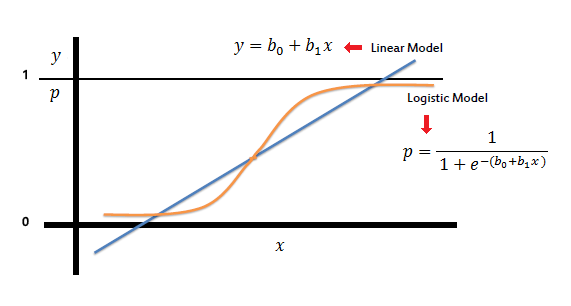

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("test accuracy {}".format(lr.score(X_test,y_test)))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test,y_pred)

# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print(" {} nn score: {} ".format(3,knn.score(X_test,y_test)))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test,y_pred)

# SVM

In [ ]:
svm = SVC(random_state = 1)
svm.fit(X_train,y_train)
print("print accuracy of svm algo: ",svm.score(X_test,y_test))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test,y_pred)

# Naive Bayes
## $ PosteriorProbability = \frac{Likelihood \times PriorProbability}{MarginalLikelihood} $
## $ P(A|X) = \frac{P(X|A)\times P(A)}{P(X)} $
## $ PriorProbability = \frac{NumberOfA}{TotalA} $
## $ MarginalProbability = \frac{NumberOfSimilarObservations}{TotalA} $
## $ Likelihood = \frac{NumberOfSimilarObservationsAmongThoseChoosenA}{TotalA} $
## $ P(B|X) = \frac{P(X|B)\times P(B)}{P(X)} $
## $ P(A|X) vs P(B|X) = P(X|B)\times P(B) vs P(X|A)\times P(A) $


In [ ]:
nb = GaussianNB()
nb.fit(X_train,y_train)
print("print accuracy of naive bayes algo: ",nb.score(X_test,y_test))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test,y_pred)

# Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("score: ", dt.score(X_test,y_test))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test,y_pred)

# Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(X_train,y_train)
print("random forest algo result: ",rf.score(X_test,y_test))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test,y_pred)